In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from methods import *
from main import *

plt.rcParams['figure.figsize'] = [7.5, 4.5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

### Задание
Смоделировать радиоактивный распад вещества, заданный уравнением

$\frac{dx}{dt}=-kx$

при помощи различных численных методов

### Выполнение работы
Данное уравнение имеет аналитическое решение 
$x(t) = x_{0}e^{-kx}$

где $x_{0}$ - начальное количество вещества

Само уравнение задано в программе функцией правой части `f`

In [2]:
def f(x, t, context):
    k = context[0]
    global f_call_count
    f_call_count += 1
    return -k * x

Зададим параметры и отобразим график точного решения

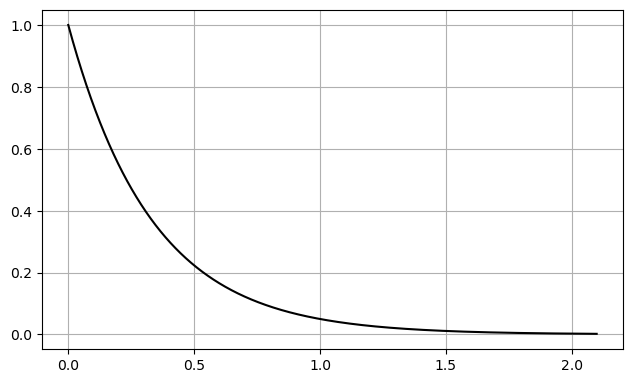

In [3]:
# начальное кол-во вещества
N0 = 1
# коэффициент распада
k = 3
# шаг
h = 0.1
n_steps = 20

draw_exact(N0, k, h, n_steps)

#### Явные методы
Реализуем явный метод Эйлера. 

Его таблица Бутчера выглядит следующим образом

| 0 |   |
|---|---|
| 1 |   |

In [4]:
def step_euler_forward(x0, t0, h, func, context):
    return x0 + h * func(x0, t0, context)

Отобразим решение полученное методом Эйлера на графике вместе с точным решением

Используется метод step_euler_forward
Функция правой части была вызвана 20 раз


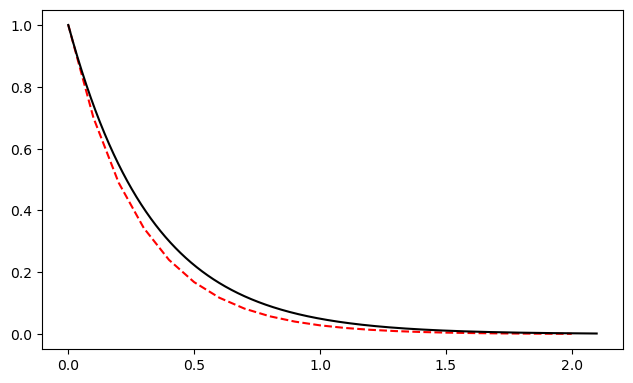

In [5]:
t_full = [h * t for t in range(n_steps + 1)]
x_euler = integrate(N0, [k], h, step_euler_forward, n_steps)
plt.plot(t_full, x_euler, 'r--')
plt.grid()
draw_exact(N0, k, h, n_steps)

Заметны небольшие расхождения с истинным решением. Отобразим график разности полученного решения и точного решения

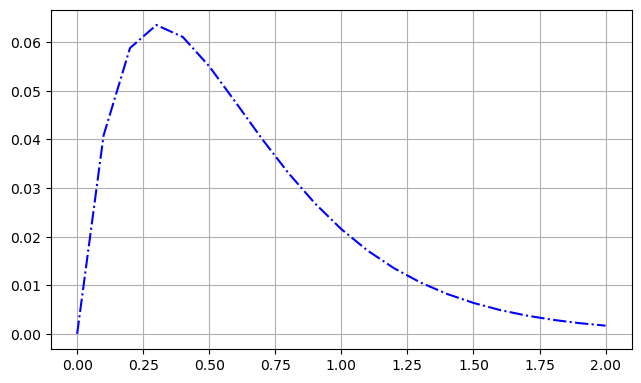

In [6]:
draw_diff(N0, k, h, n_steps, x_euler)

На графике видно, что ошибка резко возрастает в начале распада. Это связано с жесткостью задачи.

Рассчитаем метрики для данной разности.

In [7]:
display_error(N0, k, h, n_steps, x_euler)

Максимальная по модулю ошибка = 0.06356965974059908
Средняя ошибка = -0.02474949488126303
Стандартное отклонение ошибки = 0.021791550323556598



Реализуем метод Ралстона второго порядка и метод средней точки, отобразим их графики

Таблица Бутчера для метода Ралстона

|     |   |
|-----|---|
| 0   |   |
| 2/3 | 0 |
| 1/4  | 3/4 |

Таблица Бутчера для метода средней точки

|     |   |
|-----|---|
| 0   |   |
| 1/2 | 0 |
| 0   | 1 |

In [8]:
def step_midpoint(x0, t0, h, func, context):
    k1 = func(x0, t0, context)
    k2 = func(x0 + h * (k1 / 2), t0 + h / 2, context)
    xp = x0 + h * k2
    return xp


def step_ralston2(x0, t0, h, func, context):
    k1 = func(x0, t0, context)
    k2 = func(x0 + 2 * h * (k1 / 3), t0 + 2 * h / 3, context)
    xp = x0 + h * (k1 / 4 + 3 * k2 / 4)
    return xp

Используется метод step_midpoint
Функция правой части была вызвана 40 раз
Используется метод step_ralston2
Функция правой части была вызвана 40 раз


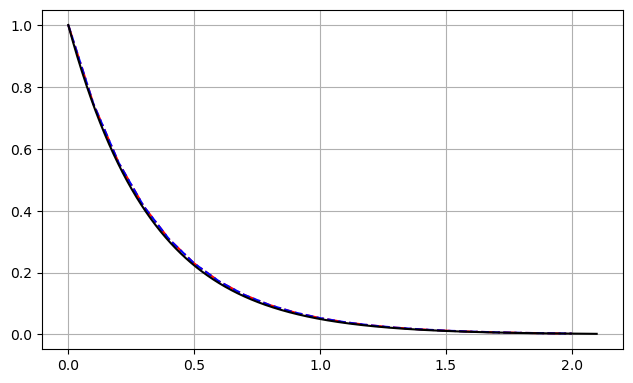

In [9]:
t_full = [h * t for t in range(n_steps + 1)]

x_midpoint = integrate(N0, [k], h, step_midpoint, n_steps)
plt.plot(t_full, x_midpoint, 'r-.')

x_ralston2 = integrate(N0, [k], h, step_ralston2, n_steps)
plt.plot(t_full, x_ralston2, 'b--')
draw_exact(N0, k, h, n_steps)

Для параметров 
N0 = 1,
k = 1,
h = 0.1 
графики выглядят идентично. Отобразим графики их ошибок и посчитаем метрики этих ошибок

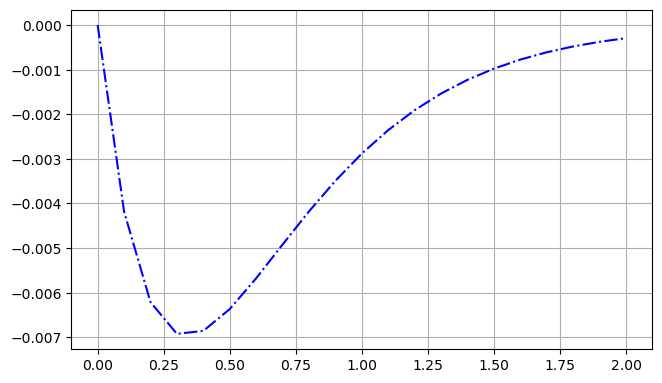

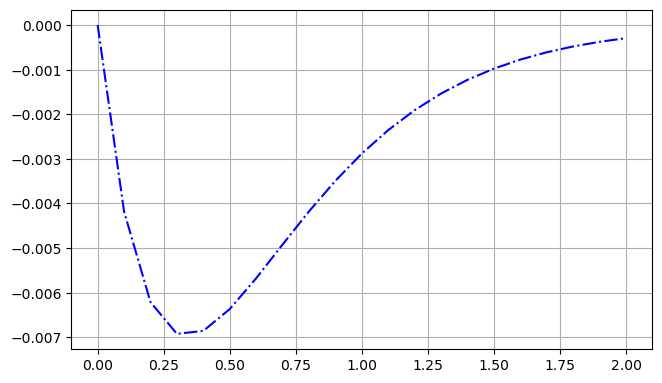

In [10]:
draw_diff(N0, k, h, n_steps, x_midpoint)
draw_diff(N0, k, h, n_steps, x_ralston2)

In [11]:
print('Для метода средней точки')
display_error(N0, k, h, n_steps, x_midpoint)
print('\nДля метода Ралстона второго порядка')
display_error(N0, k, h, n_steps, x_ralston2)

Для метода средней точки
Максимальная по модулю ошибка = 0.0069239652594009216
Средняя ошибка = 0.0029644254880526674
Стандартное отклонение ошибки = 0.0023602906805444013


Для метода Ралстона второго порядка
Максимальная по модулю ошибка = 0.0069239652594008105
Средняя ошибка = 0.0029644254880526392
Стандартное отклонение ошибки = 0.0023602906805443745



Метод Ралстона имеет наименьшую теоретическую оценку ошибки среди всех методов второго порядка. При решении данной задачи он показывает лучшие характеристики, чем метод средней точки, но разница между ними крайне мала (максимальная по модулю ошибка отличается примерно на 10^(-16))

Реализуем методы 3, 4, 5 порядков:
- метод Ралстона порядка 3
- классический метод Рунге-Кутты порядка 4
- метод Рунге-Кутты-Фельберга порядка 5

Таблица Бутчера для метода Ралстона

|     |     |     |   |   |
|-----|-----|-----|---|---|
| 0   |     |     |   |   |
| 1/2 | 0   |     |   |   |
| 0   | 3/4 | 0   |   |   |
| 2/9 | 1/3 | 4/9 |   |   |

In [12]:
def step_ralston3(x0, t0, h, func, context):
    k1 = func(x0, t0, context)
    k2 = func(x0 + h * (k1 / 2), t0 + h / 2, context)
    k3 = func(x0 + 3 * h * (k2 / 4), t0 + 3 * h / 4, context)
    xp = x0 + h * (2 * k1 / 9 + k2 / 3 + 4 * k3 / 9)
    return xp

Таблица Бутчера для метода Рунге-Кутты

|     |     |     |     |   |
|-----|-----|-----|-----|---|
| 0   |     |     |     |   |
| 1/2 | 0   |     |     |   |
| 0   | 1/2 | 0   |     |   |
| 0   | 0   | 1   | 0   |   |
| 1/6 | 1/3 | 1/3 | 1/6 |   |

In [13]:
def step_rk4(x0, t0, h, func, context):
    k1 = func(x0, t0, context)
    k2 = func(x0 + h * (k1 / 2), t0 + h / 2, context)
    k3 = func(x0 + h * (k2 / 2), t0 + h / 2, context)
    k4 = func(x0 + h * k3, t0 + h, context)
    xp = x0 + 1 / 6 * h * (k1 + 2 * k2 + 2 * k3 + k4)
    return xp

Таблица Бутчера для метода Рунге-Кутты-Фельберга

|           |            |            |             |        |      |
|-----------|------------|------------|-------------|--------|------|
| 0         |            |            |             |        |      |
| 1/4       |   0        |            |             |        |      |
| 3/32      | 9/32       |     0      |             |        |      |
| 1932/2197 | -7200/2197 | 7296/2197  |        0    |        |      |
| 439/216   | -8         | 3680/513   | -845/4104   |     0  |      |
| -8/27     | 2          | -3544/2565 | 1859/4104   | -11/40 |   0  |
| 16/135    | 0          | 6656/12825 | 28561/56430 | -9/50  | 2/55 |

In [14]:
def step_rkf5(x0, t0, h, func, context):
    k1 = func(x0, t0, context)
    k2 = func(x0 + h * (k1 / 4), t0 + h / 4, context)
    k3 = func(x0 + h * (3 / 32 * k1 + 9 / 32 * k2), t0 + 3 / 8 * h, context)
    k4 = func(x0 + h * (1932 / 2197 * k1 - 7200 / 2197 * k2 + 7296 / 2197 * k3), t0 + 12 / 13 * h, context)
    k5 = func(x0 + h * (439 / 216 * k1 - 8 * k2 + 3680 / 513 * k3 - 845 / 4104 * k4), t0 + h, context)
    k6 = func(x0 + h * (-8 / 27 * k1 + 2 * k2 - 3544 / 2565 * k3 + 1859 / 4104 * k4 - 11 / 40 * k5),
              t0 + 0.5 * h,
              context)
    xp = x0 + h * (16 / 135 * k1 + 6656 / 12825 * k3 + 28561 / 56430 * k4 - 9 / 50 * k5 + 2 / 55 * k6)
    return xp

Код для вывода полученных решений на экран:

Используется метод step_ralston3
Функция правой части была вызвана 60 раз
Используется метод step_rk4
Функция правой части была вызвана 80 раз
Используется метод step_rkf5
Функция правой части была вызвана 120 раз


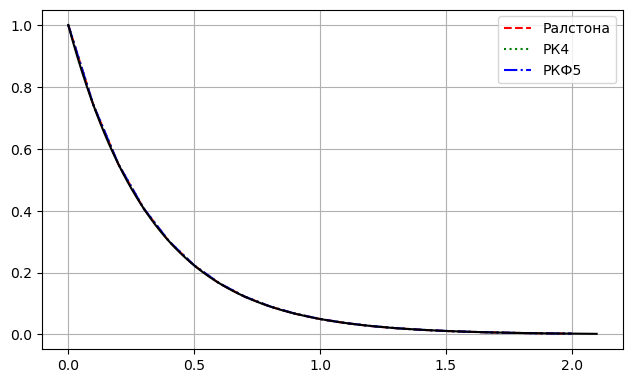

In [15]:
t_full = [h * t for t in range(n_steps + 1)]

x_ralston3 = integrate(N0, [k], h, step_ralston3, n_steps)
plt.plot(t_full, x_ralston3, 'r--')

x_rk4 = integrate(N0, [k], h, step_rk4, n_steps)
plt.plot(t_full, x_rk4, 'g:')

x_rk5 = integrate(N0, [k], h, step_rkf5, n_steps)
plt.plot(t_full, x_rk5, 'b-.')

plt.legend(['Ралстона', 'РК4', 'РКФ5'])
draw_exact(N0, k, h, n_steps)

Полученные графики численных решений и их ошибок выглядят, как и в предыдущем случае, одинаково. Посчитаем метрики ошибок данных методов.

In [16]:
print('Для метода Ралстона')
display_error(N0, k, h, n_steps, x_ralston3)
print('\nДля метода Рунге-Кутты')
display_error(N0, k, h, n_steps, x_rk4)
print('\nДля метода Рунге-Кутты_Фельберга')
display_error(N0, k, h, n_steps, x_rk5)

Для метода Ралстона
Максимальная по модулю ошибка = 0.0005237046155990854
Средняя ошибка = -0.00022186279955832758
Стандартное отклонение ошибки = 0.0001786572902747691


Для метода Рунге-Кутты
Максимальная по модулю ошибка = 3.17429687036741e-05
Средняя ошибка = 1.3458167297180889e-05
Стандартное отклонение ошибки = 1.08282550295585e-05


Для метода Рунге-Кутты_Фельберга
Максимальная по модулю ошибка = 1.0211196370679687e-06
Средняя ошибка = -4.329073194323087e-07
Стандартное отклонение ошибки = 3.483284497441815e-07



Очевидно, что с повышением порядка метода уменьшается ошибка и возрастает число вызовов функции правой части. Если сравнить прирост точности вычислений метода второго порядка с методом первого порядка, получим хорошее улучшение (максимальная ошибка снизилась на 0.15, остальные показатели также улучшились). Однако далее с повышением порядка метода точность растет незначительно, при том что число вызовов функции `f` растет в арифметической прогрессии (до 4 порядка, далее - еще больше, т.к. для порядка n > 4 ранг s > n). Таким образом, на практике для данной задачи использовать методы более высоких порядков нецелесообразно.

#### Жесткость задачи

Изменим значение коэффициента распада k и посмотрим, как это влияет на полученные решения.

In [17]:
# начальное кол-во вещества
N0 = 1
# коэффициент распада
k = 9
# шаг
h = 0.1
n_steps = 10

Используется метод step_euler_forward
Функция правой части была вызвана 10 раз
Используется метод step_ralston2
Функция правой части была вызвана 20 раз
Используется метод step_ralston3
Функция правой части была вызвана 30 раз
Используется метод step_rk4
Функция правой части была вызвана 40 раз
Используется метод step_rkf5
Функция правой части была вызвана 60 раз


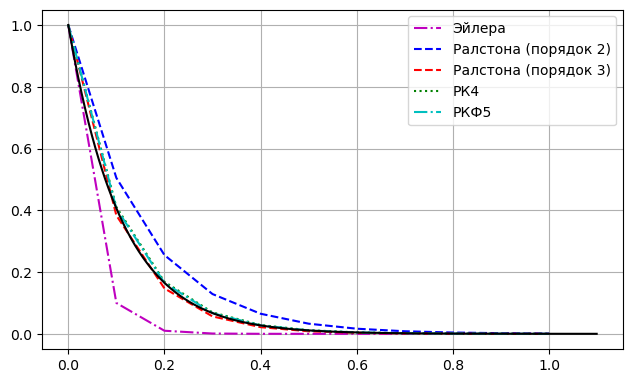

In [18]:
t_full = [h * t for t in range(n_steps + 1)]

x_euler = integrate(N0, [k], h, step_euler_forward, n_steps, trunc_zero=False)
plt.plot(t_full, x_euler, 'm-.')

x_ralston2 = integrate(N0, [k], h, step_ralston2, n_steps, trunc_zero=False)
plt.plot(t_full, x_ralston2, 'b--')

x_ralston3 = integrate(N0, [k], h, step_ralston3, n_steps, trunc_zero=False)
plt.plot(t_full, x_ralston3, 'r--')

x_rk4 = integrate(N0, [k], h, step_rk4, n_steps, trunc_zero=False)
plt.plot(t_full, x_rk4, 'g:')

x_rk5 = integrate(N0, [k], h, step_rkf5, n_steps, trunc_zero=False)
plt.plot(t_full, x_rk5, 'c-.')

plt.legend(['Эйлера', 'Ралстона (порядок 2)', 'Ралстона (порядок 3)', 'РК4', 'РКФ5'])

draw_exact(N0, k, h, n_steps)
#plt.show()

Видно, что при больших значениях k метод Эйлера "прыгает" между разными по знаку значениями, уходя в отрицательную область, методы 2 и 3 порядков приобретают огромную ошибку, метод Рунге-Кутты 4 порядка также стал работать хуже, что заметно по графику. Посчитаем ошибку для метода 5 порядка.

In [19]:
display_error(N0, k, h, n_steps, x_rk5)

Максимальная по модулю ошибка = 0.00039740925982978403
Средняя ошибка = -0.00010243419457392978
Стандартное отклонение ошибки = 0.00013511370343805267



Для метода 5 порядка ошибка тоже увеличилась во много раз. Такое поведение связано с жесткостью задачи (stiff equation). В данном случае жесткость задачи регулируется коэффициентом k. Данную проблему можно решить следующими способами:
- Уменьшение длины шага
- Использование неявных методов

При уменьшении длины шага сильно возрастет количество обращений к функции `f`. Реализуем 2 неявных метода Рунге-Кутты: обратный метод Эйлера порядка 1 и неявный метод средней точки (implicit midpoint) порядка 2.

Таблица Бутчера для обратного метода Эйлера:

|   |
|---|
| 1 |
| 1 |

In [20]:
def step_euler_backward(x0, t0, h, func, context):
    t = t0
    x = x0
    xp = x + h * func(x, t, context)
    f_ = lambda xp, f, t0, x0, h, context: xp - x0 - h * f(xp, t0 + h, context)
    result = fsolve(f_, xp, args=(func, t, x, h, context))
    return result

Таблица Бутчера для неявного метода средней точки:

|   |
|---|
| 1/2 |
| 1 |

In [21]:
def step_implicit_midpoint(x0, t0, h, func, context):
    tp = t0 + 0.5 * h
    k = x0
    # fixed point
    for _ in range(50):
        buffer = k
        k = func(x0 + 0.5 * h * k, tp, context)
        if np.abs(k - buffer) < 1e-10:
            break
    xp = x0 + h * k
    return xp

Используем неявные методы для решения задачи с теми же параметрами.

Используется метод step_euler_backward
Функция правой части была вызвана 76 раз
Используется метод step_implicit_midpoint
Функция правой части была вызвана 278 раз


S:\Anaconda\envs\tf-gpu\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


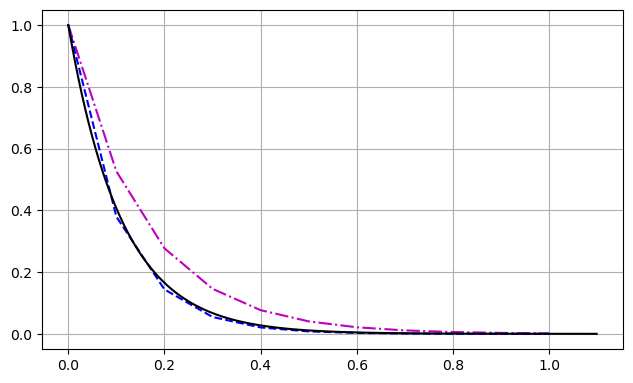

In [22]:
t_full = [h * t for t in range(n_steps + 1)]

x_euler_back = integrate(N0, [k], h, step_euler_backward, n_steps, trunc_zero=False)
plt.plot(t_full, x_euler_back, 'm-.')

x_implicit_midpoint = integrate(N0, [k], h, step_implicit_midpoint, n_steps, trunc_zero=False)
plt.plot(t_full, x_implicit_midpoint, 'b--')

draw_exact(N0, k, h, n_steps)

Рассчитаем метрики ошибок

Для обратного метода Эйлера
Максимальная по модулю ошибка = [0.11974613]
Средняя ошибка = [0.0385696]
Стандартное отклонение ошибки = [0.04299382]



S:\Eltech\LvL6\Differential Equations\Курсач\main.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  diff = x - x_true
S:\Eltech\LvL6\Differential Equations\Курсач\main.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  diff = x_true - x


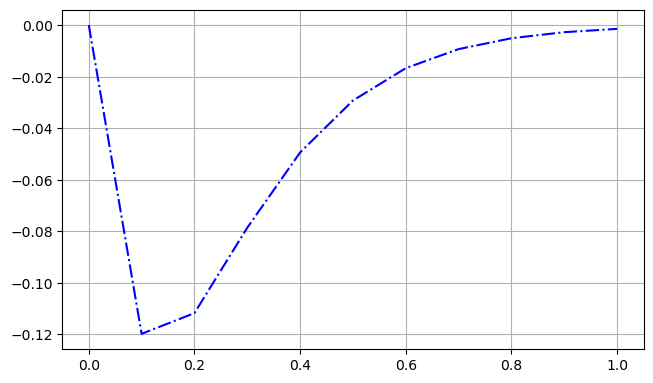


Для неявного метода средней точки
Максимальная по модулю ошибка = 0.027259314915605737
Средняя ошибка = -0.006723615021634149
Стандартное отклонение ошибки = 0.009153971939643308



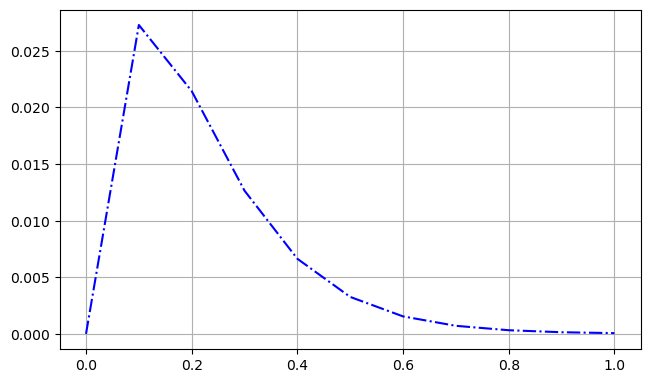

In [23]:
print('Для обратного метода Эйлера')
display_error(N0, k, h, n_steps, x_euler_back)
draw_diff(N0, k, h, n_steps, x_euler_back)

print('\nДля неявного метода средней точки')
display_error(N0, k, h, n_steps, x_implicit_midpoint)
draw_diff(N0, k, h, n_steps, x_implicit_midpoint)

Сравним полученные ошибки с ошибками явных методов тех же порядков на жесткой задаче.

Для прямого метода Эйлера
Максимальная по модулю ошибка = 0.30656965974059913
Средняя ошибка = -0.05217473536887763
Стандартное отклонение ошибки = 0.09216111554455934



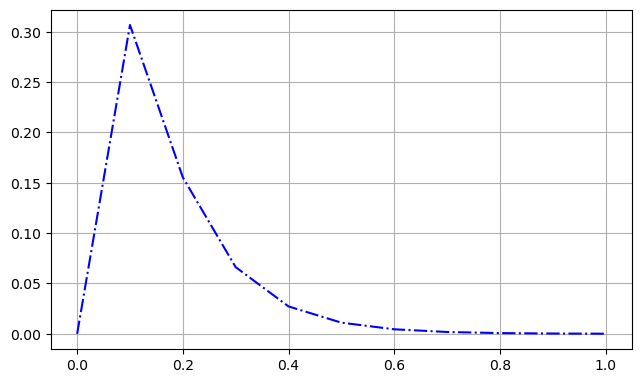


Для явного метода Ралстона 2 порядка
Максимальная по модулю ошибка = 0.098430340259401
Средняя ошибка = 0.030369844993033267
Стандартное отклонение ошибки = 0.035013857160488264



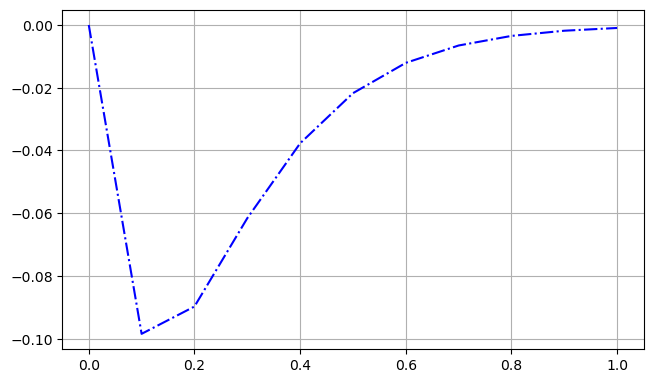

In [24]:
print('Для прямого метода Эйлера')
display_error(N0, k, h, n_steps, x_euler)
draw_diff(N0, k, h, n_steps, x_euler)

print('\nДля явного метода Ралстона 2 порядка')
display_error(N0, k, h, n_steps, x_ralston2)
draw_diff(N0, k, h, n_steps, x_ralston2)

Видно, что максимальная ошибка уменьшилась приблизительно в три раза при использовании неявных методов на жесткой задаче. Также эти методы более устойчивы. При этом, обратный метод Эйлера вызвал функцию `f` 76 раз, а неявный метод средней точки 278 раз (при k = 9), что намного больше результатов явных методов. Это связано с тем, что на каждом шаге для неявных методов необходимо дополнительно численно решать уравнение.

#### Адаптивный шаг
Вложенные методы Рунге-Кутты позволяют на каждом шаге оценивать локальную ошибку и изменять длину шага оптимальным образом. Реализуем вложенный метод Рунге-Кутты-Фельберга 4(5).

In [25]:
def rk45(x0, func, context, step_and_time, atol, rtol):
    h = step_and_time[0]
    t0 = step_and_time[1]
    k1 = func(x0, t0, context)
    k2 = func(x0 + h * (k1 / 4), t0 + h / 4, context)
    k3 = func(x0 + h * (3 / 32 * k1 + 9 / 32 * k2), t0 + 3 / 8 * h, context)
    k4 = func(x0 + h * (1932 / 2197 * k1 - 7200 / 2197 * k2 + 7296 / 2197 * k3), t0 + 12 / 13 * h, context)
    k5 = func(x0 + h * (439 / 216 * k1 - 8 * k2 + 3680 / 513 * k3 - 845 / 4104 * k4), t0 + h, context)
    k6 = func(x0 + h * (-8 / 27 * k1 + 2 * k2 - 3544 / 2565 * k3 + 1859 / 4104 * k4 - 11 / 40 * k5), t0 + 0.5 * h,
              context)
    # оценка ошибки 5 порядок
    x_hat = x0 + h * (16 / 135 * k1 + 6656 / 12825 * k3 + 28561 / 56430 * k4 - 9 / 50 * k5 + 2 / 55 * k6)
    # оценка метода 4 порядок
    xp = x0 + h * (25 / 216 * k1 + 1408 / 2565 * k3 + 2197 / 4104 * k4 - 0.2 * k5)
    tol = atol + np.max([x_hat, xp]) * rtol
    err = np.sqrt((x_hat - xp) ** 2 / tol)
    # h_opt = h * (1 / err)**(1 / (min(p, p_hat) + 1)
    h_opt = h * (1 / err) ** 0.2
    step_and_time[0] = h_opt
    step_and_time[1] = t0 + h_opt
    return xp

Установим начальные параметры и отобразим график полученного решения

In [26]:
# начальное кол-во вещества
N0 = 1
# коэффициент распада
k = 4

Используется метод rk45


A_tol =  0.0000000000000001
R_tol =  0.0000000000000001
До какого момента времени интегрировать:  5


Функция правой части была вызвана 324 раз
Было сделано 55 шагов


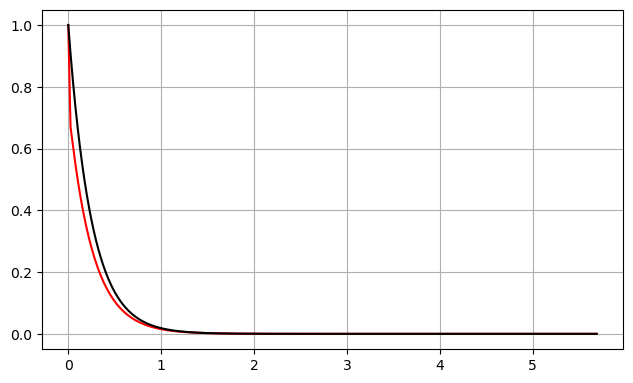

In [27]:
x_45, t_45 = integrate(N0, [k], h, rk45, n_steps)
print(f'Было сделано {len(x_45)} шагов')
plt.plot(t_45, x_45, 'r')

t = np.arange(0, t_45[-1], 0.001)
x_true = N0 * (np.e ** (-k * t))

plt.plot(t, x_true, 'k')
plt.grid()
plt.show()

Рассчитаем метрики ошибки

Для метода Рунге-Кутты-Фельберга 4(5)
Максимальная по модулю ошибка = 0.23689146165932395
Средняя ошибка = -0.03440039548146308
Стандартное отклонение ошибки = 0.05832084501114875


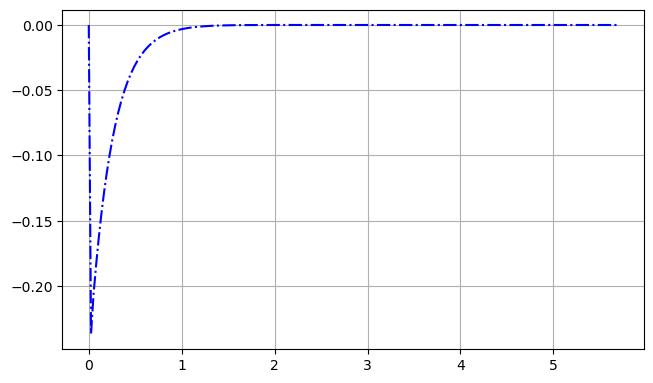

In [28]:
print('Для метода Рунге-Кутты-Фельберга 4(5)')
x_true = N0 * (np.e ** (-k * np.array(t_45)))
diff = x_45 - x_true
print(f'Максимальная по модулю ошибка = {np.max(np.abs(diff))}')
print(f'Средняя ошибка = {np.mean(diff)}')
print(f'Стандартное отклонение ошибки = {np.std(diff)}')
plt.plot(t_45, diff, 'b-.')
plt.grid()
plt.show()

Показатели ошибки сравнимы с показателями методов соответствующего порядка при том же коэффициенте k, однако вложенный метод совершает намного меньшее число шагов, т.к. величина шага выбирается оптимальная.

Сравним показатели ошибок при различных `rtol`, `atol`.

In [29]:
x_45, t_45 = integrate(N0, [k], h, rk45, n_steps)
print(f'Было сделано {len(x_45)} шагов')
x_true = N0 * (np.e ** (-k * np.array(t_45)))
diff = x_45 - x_true
print(f'Максимальная по модулю ошибка = {np.max(np.abs(diff))}')
print(f'Средняя ошибка = {np.mean(diff)}')
print(f'Стандартное отклонение ошибки = {np.std(diff)}')

Используется метод rk45


A_tol =  0.0000000000000001
R_tol =  0.0000000000000001
До какого момента времени интегрировать:  5


Функция правой части была вызвана 324 раз
Было сделано 55 шагов
Максимальная по модулю ошибка = 0.23689146165932395
Средняя ошибка = -0.03440039548146308
Стандартное отклонение ошибки = 0.05832084501114875


| atol, rtol | Максимальная по модулю ошибка | Средняя ошибка        | Стандартное отклонение ошибки | Число вызовов f | Число шагов | Интервал интегрирования |
|------------|-------------------------------|-----------------------|-------------------------------|-----------------|-------------|-------------------------|
| 10^{-7}    | 0.20898747059250955           | 0.03709266180322486   | 0.062357594922912055          | 60              | 11          | [0, 5]                  |
| 10^{-10}   | 0.23522612381877706           | 0.06574373940015864   | 0.07113737351094292           | 60              | 11          | [0, 5]                  |
| 10^{-13}   | 0.08692914891620229           | 0.027510324750172822  | 0.025112834406690165          | 108             | 19          | [0, 5]                  |
| 10^{-16}   | 0.0060370661027575045         | 0.0036775749745126857 | 0.0018242166253867624         | 204             | 35          | [0, 5]                  |
| 10^{-19}   | 0.045925842300907904          | 0.009750758048837004  | 0.012520025496543257          | 396             | 67          | [0, 5]                  |

Из таблицы можно сделать вывод, что оптимальные значения `rtol`, `atol` - около 10^(-16)

#### Многошаговые методы

Реализуем явный многошаговый метод Адамса-Башфорта.

In [30]:
def adams_bashforth(x0, t0, h, func, context, acc):
    f_3 = func(acc[0], t0 - 3*h, context)
    f_2 = func(acc[1], t0 - 2*h, context)
    f_1 = func(acc[2], t0 - 1*h, context)
    f_0 = func(x0, t0, context)
    xp = x0 + h * (55 / 24 * f_0 - 59 / 24 * f_1 + 37 / 24 * f_2 - 3 / 8 * f_3)
    return xp

В коде выше `acc` - список из трех предыдущих вычисленных значений функции. В качестве метода для разгона используется Рунге-Кутты 4 порядка. Воспользуемся данным методом и посчитаем его ошибку.

In [31]:
N0 = 1
k = 3
h = 0.1
n_steps = 40

Используется метод adams_bashforth
Функция правой части была вызвана 160 раз


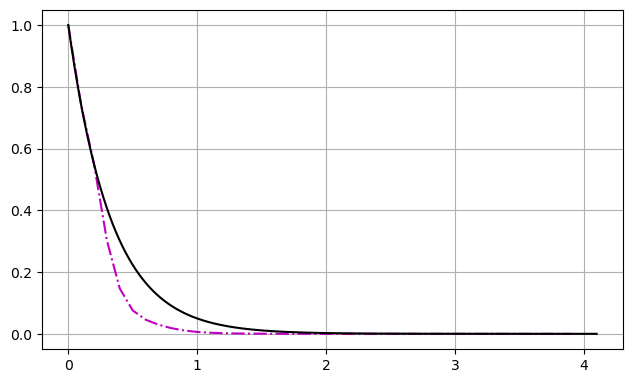

In [32]:
t_full = [h * t for t in range(n_steps)]

x_bashforth = integrate(N0, [k], h, adams_bashforth, n_steps)
plt.plot(t_full, x_bashforth, 'm-.')

draw_exact(N0, k, h, n_steps)

Для метода Адамса-Башфорта
Максимальная по модулю ошибка = 0.1549085810221379
Средняя ошибка = -0.023136080079123704
Стандартное отклонение ошибки = 0.042152136312674025



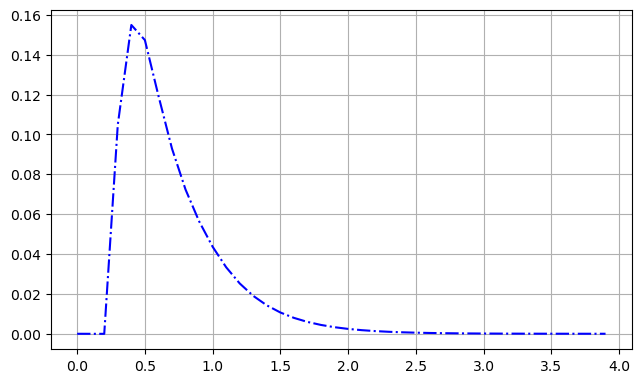

In [33]:
print('Для метода Адамса-Башфорта')
display_error(N0, k, h, n_steps, x_bashforth)
draw_diff(N0, k, h, n_steps, x_bashforth)

Реализуем неявный многошаговый метод Адамса_Мултона по схеме PECEC. Для разгона также используется метод Рунге-Кутты 4 порядка.

In [34]:
def adams_moulton(x0, t0, h, func, context, acc):
    f_3 = func(acc[0], t0 - 3*h, context)
    f_2 = func(acc[1], t0 - 2*h, context)
    f_1 = func(acc[2], t0 - 1*h, context)
    f_0 = func(x0, t0, context)
    # Predictor
    x_next = x0 + h * (55 / 24 * f_0 - 59 / 24 * f_1 + 37 / 24 * f_2 - 3 / 8 * f_3)
    # Evaluator
    f_next = func(x_next, t0 + h, context)
    # Corrector
    x_next = x0 + h / 24 * (9 * f_next + 19 * f_0 - 5 * f_1 + f_2)
    # Evaluator
    f_next = func(x_next, t0 + h, context)
    # Corrector
    x_next = x0 + h / 24 * (9 * f_next + 19 * f_0 - 5 * f_1 + f_2)
    return x_next

Используется метод adams_moulton
Функция правой части была вызвана 234 раз


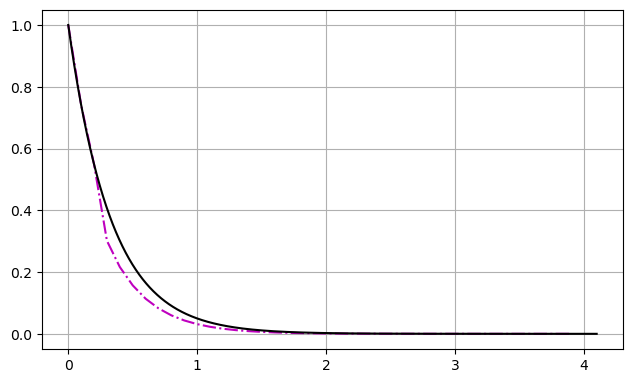

In [35]:
t_full = [h * t for t in range(n_steps)]

x_moulton = integrate(N0, [k], h, adams_moulton, n_steps)
plt.plot(t_full, x_moulton, 'm-.')

draw_exact(N0, k, h, n_steps)

Для метода Адамса-Мултона
Максимальная по модулю ошибка = 0.10537172242387344
Средняя ошибка = -0.012022277791913314
Стандартное отклонение ошибки = 0.02425082621361231



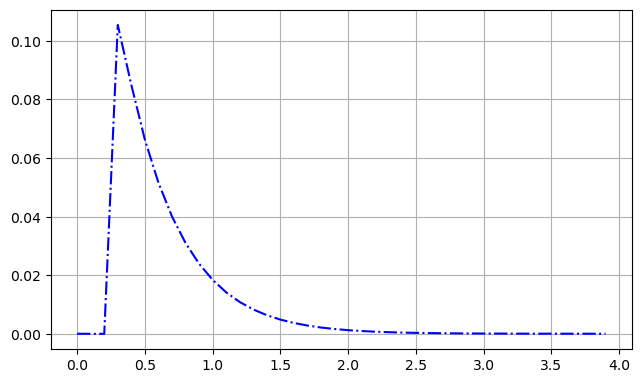

In [36]:
print('Для метода Адамса-Мултона')
display_error(N0, k, h, n_steps, x_moulton)
draw_diff(N0, k, h, n_steps, x_moulton)

Метод Адамса-Мултона имеет порядок оценки локальной ошибки на 1 больше, т.к. интерполяция производится по k+1 точке. При заданных параметрах он дает прирост в точности примерно в 1.5 раза. Более того, будучи неявным методом, он обладает лучшей по сравнению с методом Адамса-Башфорта устойчивостью и при увеличении коэффициента распада k будет работать с меньшей ошибкой. 

#### Изменение длины шага
Рассмотри работу нескольких методов при различной длине шага h.

In [37]:
h = 0.1
n_steps = 20
x_rk4 = integrate(N0, [k], h, step_rk4, n_steps)
display_error(N0, k, h, n_steps, x_rk4)

h = 0.01
n_steps = 200
x_rk4 = integrate(N0, [k], h, step_rk4, n_steps)
display_error(N0, k, h, n_steps, x_rk4)

h = 0.001
n_steps = 2000
x_rk4 = integrate(N0, [k], h, step_rk4, n_steps)
display_error(N0, k, h, n_steps, x_rk4)

Используется метод step_rk4
Функция правой части была вызвана 80 раз
Максимальная по модулю ошибка = 3.17429687036741e-05
Средняя ошибка = 1.3458167297180889e-05
Стандартное отклонение ошибки = 1.08282550295585e-05

Используется метод step_rk4
Функция правой части была вызвана 800 раз
Максимальная по модулю ошибка = 2.5459429009444534e-09
Средняя ошибка = 1.1280050245208198e-09
Стандартное отклонение ошибки = 8.440807158953465e-10

Используется метод step_rk4
Функция правой части была вызвана 8000 раз
Максимальная по модулю ошибка = 2.485234240623413e-13
Средняя ошибка = 1.1063996043570274e-13
Стандартное отклонение ошибки = 8.227332812149478e-14



При интегрировании методом Рунге-Кутты 4 порядка на одном и том же временном интервале с уменьшением шага в 10 раз метрики точности уменьшаются на 4 порядка, что подтверждает теоретическую оценку ошибки метода.

In [38]:
h = 0.1
n_steps = 20
x_b = integrate(N0, [k], h, adams_moulton, n_steps)
display_error(N0, k, h, n_steps, x_b)

h = 0.01
n_steps = 200
x_b = integrate(N0, [k], h, adams_moulton, n_steps)
display_error(N0, k, h, n_steps, x_b)

h = 0.001
n_steps = 2000
x_b = integrate(N0, [k], h, adams_moulton, n_steps)
display_error(N0, k, h, n_steps, x_b)

Используется метод adams_moulton
Функция правой части была вызвана 114 раз
Максимальная по модулю ошибка = 0.10537172242387344
Средняя ошибка = -0.02379540022171049
Стандартное отклонение ошибки = 0.02998132245453481

Используется метод adams_moulton
Функция правой части была вызвана 1194 раз
Максимальная по модулю ошибка = 0.027010748585892697
Средняя ошибка = -0.005305340080608838
Стандартное отклонение ошибки = 0.0067646850098749415

Используется метод adams_moulton
Функция правой части была вызвана 11994 раз
Максимальная по модулю ошибка = 0.0029686659109534608
Средняя ошибка = -0.0005754250557133358
Стандартное отклонение ошибки = 0.0007337774161159207



При изменении шага 0.1 на 0.01 метрики уменьшились в 7 раз, при дальнейшем уменьшении метрики уменьшаются примерно в 10 раз.

#### Сравнение методов
Зададим одни параметра задачи для всех методов и сведем их характеристики в одну таблицу. Для метода с адаптивным шагов интегрирование будем проводить на том же временном интервале, что и для других методов - `h * n_steps`

In [39]:
N0 = 1
k = 1
h = 0.1
n_steps = 40

In [40]:
t_full = [h * t for t in range(n_steps + 1)]

x_euler = integrate(N0, [k], h, step_euler_forward, n_steps)
display_error(N0, k, h, n_steps, x_euler)

x_midpoint = integrate(N0, [k], h, step_midpoint, n_steps)
display_error(N0, k, h, n_steps, x_midpoint)

x_ralston2 = integrate(N0, [k], h, step_ralston2, n_steps)
display_error(N0, k, h, n_steps, x_ralston2)

x_ralston3 = integrate(N0, [k], h, step_ralston3, n_steps)
display_error(N0, k, h, n_steps, x_ralston3)

x_rk4 = integrate(N0, [k], h, step_rk4, n_steps)
display_error(N0, k, h, n_steps, x_rk4)

x_rk5 = integrate(N0, [k], h, step_rkf5, n_steps)
display_error(N0, k, h, n_steps, x_rk5)

x_euler_back = integrate(N0, [k], h, step_euler_backward, n_steps)
display_error(N0, k, h, n_steps, x_euler_back)

x_implicit_midpoint = integrate(N0, [k], h, step_implicit_midpoint, n_steps)
display_error(N0, k, h, n_steps, x_implicit_midpoint)

x_45, t_45 = integrate(N0, [k], h, rk45, n_steps)
print(f'Было сделано {len(x_45)} шагов')
x_true = N0 * (np.e ** (-k * np.array(t_45)))
diff = x_45 - x_true
print(f'Максимальная по модулю ошибка = {np.max(np.abs(diff))}')
print(f'Средняя ошибка = {np.mean(diff)}')
print(f'Стандартное отклонение ошибки = {np.std(diff)}\n')

x_bashforth = integrate(N0, [k], h, adams_bashforth, n_steps)
display_error(N0, k, h, n_steps, x_bashforth)

x_moulton = integrate(N0, [k], h, adams_moulton, n_steps)
display_error(N0, k, h, n_steps, x_moulton)

S:\Eltech\LvL6\Differential Equations\Курсач\main.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  diff = x - x_true


Используется метод step_euler_forward
Функция правой части была вызвана 40 раз
Максимальная по модулю ошибка = 0.019201001071442347
Средняя ошибка = -0.011395334558859637
Стандартное отклонение ошибки = 0.005510046671761798

Используется метод step_midpoint
Функция правой части была вызвана 80 раз
Максимальная по модулю ошибка = 0.0006615436621095205
Средняя ошибка = 0.000399902989125523
Стандартное отклонение ошибки = 0.00018684565109632658

Используется метод step_ralston2
Функция правой части была вызвана 80 раз
Максимальная по модулю ошибка = 0.000661543662109465
Средняя ошибка = 0.0003999029891254959
Стандартное отклонение ошибки = 0.00018684565109630411

Используется метод step_ralston3
Функция правой части была вызвана 120 раз
Максимальная по модулю ошибка = 1.6606824209730586e-05
Средняя ошибка = -1.003245332230171e-05
Стандартное отклонение ошибки = 4.69295348768501e-06

Используется метод step_rk4
Функция правой части была вызвана 160 раз
Максимальная по модулю ошибка = 3.332

A_tol =  0.0000000001
R_tol =  0.0000000001
До какого момента времени интегрировать:  4


Функция правой части была вызвана 54 раз
Было сделано 10 шагов
Максимальная по модулю ошибка = 0.23522612381877706
Средняя ошибка = 0.07186243149171954
Стандартное отклонение ошибки = 0.07179663069402568

Используется метод adams_bashforth
Функция правой части была вызвана 160 раз
Максимальная по модулю ошибка = 0.08111450313129842
Средняя ошибка = -0.03973763405219356
Стандартное отклонение ошибки = 0.025767367021759368

Используется метод adams_moulton
Функция правой части была вызвана 234 раз
Максимальная по модулю ошибка = 0.0704981831604845
Средняя ошибка = -0.02082044459363222
Стандартное отклонение ошибки = 0.019334805384544497



Максимальные по модулю значения в каждом столбце выделены синим цветом, минимальные - красным

| Название метода            | Максимальная по модулю ошибка | Средняя ошибка          | Стандартное отклонение ошибки | Число вызовов f | Число шагов |
|----------------------------|-------------------------------|-------------------------|-------------------------------|-----------------|-------------|
| Прямой Эйлера              | 0.019201001071442347          | -0.011395334558859637   | 0.005510046671761798          | <font color='red'>40</font>              | 40          |
| Средней точки              | 0.0006615436621095205         | 0.000399902989125523    | 0.00018684565109632658        | 80              | 40          |
| Ралстона (порядок 2)       | 0.000661543662109465          | 0.0003999029891254959   | 0.00018684565109630411        | 80              | 40          |
| Ралстона (порядок 3)       | 1.6606824209730586e-05        | -1.003245332230171e-05  | 4.69295348768501e-06          | 120             | 40          |
| Рунге-Кутты (порядок 4)    | 3.3324105608301124e-07        | 2.0131954634718626e-07  | 9.416993879773786e-08         | 160             | 40          |
| Рунге-Кутты-Фельберга      | <font color='red'>3.6124677693649687e-09</font>        | <font color='red'>-2.1823845474680186e-09</font> | <font color='red'>1.0208404777665756e-09</font>        | 240             | 40          |
| Обратный Эйлера            | 0.01766385                    | 0.01085049              | 0.00492189                    | 280             | 40          |
| Неявный средней точки      | 0.0003068987901223563         | -0.0001853522343847324  | 8.674721244665948e-05         | <font color='cyan'>348</font>             | 40          |
| Рунге-Кутты-Фельберга 4(5) | <font color='cyan'>0.08692914891620229</font>           | <font color='cyan'>0.04423130511657728</font>     | 0.024123913206626296          | 54              | <font color='red'>10</font>          |
| Адамса-Башфорта            | 0.08111450313129842          | -0.03973763405219356    | <font color='cyan'>0.025767367021759368</font>          | 160             | 40          |
| Адамса-Мултона             | 0.0704981831604845            | -0.02082044459363222    | 0.019334805384544497          | 234             | 40          |


Высокие значения вложенного метода по первым двум метрикам объясняется выбором параметров `rtol`, `atol` 10^(-10). При этом метод сделал минимальное число шагов и вызывал функцию правой части чуть чаще прямого метода Эйлера. Многошаговые методы не продемонстрировали никаких улучшений по сравнению с одношаговыми и достаточно часто вызывали вызывали функцию f, поэтому использование многошаговых методов для данной задачи нецелесообразно. Наилучшие характеристики показал метод Рунге-Кутты-Фельберга 5 порядка, однако, как уже было описано ранее, прирост точности по сравнению с методами 3-4 порядков на практике незначителен, а функция f вызывалавсь в 2 раза чаще, чем для метода 3 порядка. Имеет смысл использовать методы Ралстона 3 порядка и классический метод Рунге-Кутты 4 порядка в зависимости от требований к точности решения.

Тем не менее, не стоит забывать про жесткость задачи. При достаточно больших значениях коэффициента распада k, явные методы, показавшие отличные результаты для текущих параметров задачи, начинают работать нестабильно и накапливать большую ошибку. В этом случае лучше всего использовать неявные методы Рунге-Кутты, т.к. они более устойчивы. Например, неявный метод средней точки показал достаточно небольшое отклонение ошибки. Большое число вызовов функции правой части можно сократить используя более оптимальные методы решения системы уравнений. Например, в данном случае неявный метод средней точки больше всех других методов вызывал функцию f, потому что в его реализации для решения уравнения использовался не самый оптимальный метод простой итерации.

На практике, жесткость задачи можно проверить интегрированием с использованием методов более низких порядков. Если заметны сильные расхождения, стоит воспользоваться неявными методами, использующими оптимальные методы для решения системы уравнений.

#### Выводы
В ходе выполнения данной работы были реализованы 11 различных численных методов решения ОДУ. Было установлено, что при малых значениях коэффициента распада наилучшим образом работают явные методы Рунге-Кутты. При этом, с повышением порядка метода выше 3-4, точность растет незначительно, а число вызовов функции правой части сильно увеличивается. При больших значениях коэффициента $k$ необходимо использовать неявные методы, такие как, например, неявный метод средней точки. Также было выяснено, что адаптивные методы Рунге-Кутты делают наименьшее число шагов, а многошаговые методы не дают значительных улучшений решения данной задачи.